# Importing the Dataset

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')    

In [98]:
df1=pd.read_csv("doctor_train.csv", error_bad_lines=False,delimiter='\t')
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# Checking Null Values
    

In [99]:
df1.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see missing values in the columns Rating and Miscellaneous Info.WE wil fix this.

In [100]:
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

# DataFrame Description

The dataset contains the data about the doctors like Qualification,and degrees of the doctor.Thier Experiencein years

 



Doctors meet the patients daily ,so the ratings are given by the patients.

Also we can know about the doctor work in which profile,Location of the doctor is also provided.Some other Miscellaeous information about the doctor
are also given in the dataset.

We are going to predict the fees of the doctor by proffession by analysing the place they stay and department they work.

Fees charged by the doctor (Dependent variable) is to be predicted





# Exploratory Data Analysis

# Checking the datatypes of the columns

In [101]:
df1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

# Statistical Analysis

In [102]:
df1.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


we got only statistical analysis only for the prediction column,since all the other features are categorical values.Mean value is greater than the median,so the data is normally distributed.

In [103]:
df1.corr()

,Fees
Fees,1.0


<AxesSubplot:>

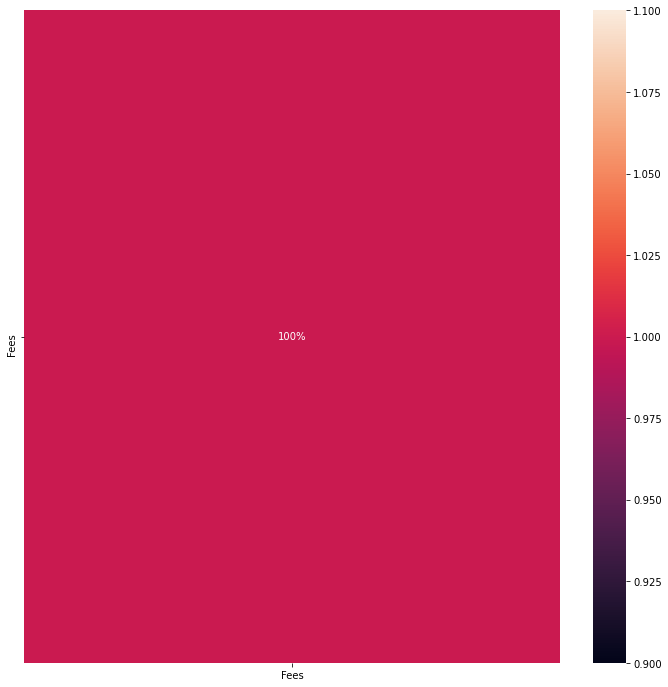

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True,fmt='.0%')

The Experience column requires to be  extracting the integer values from the string.


In [105]:
# Experience
df1['Experience'] = df1['Experience'].str.split()
df1['Experience'] = df1['Experience'].str[0].astype("int")

# Data Preprocessing

now splitting the string at ‘,’ and creating a new column ‘City’ using the last element.
‘Ratings’ column, has more than 50% of missing values. We shall fix this now.

In [106]:
df1["Rating"].fillna("-99%",inplace=True)
df1["Rating"]=df1["Rating"].str[:-1].astype("int")

bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df1["Rating"]=pd.cut(df1["Rating"],bins=bins,labels=labels,include_lowest=True)

In [107]:
df1["Rating"].value_counts().sort_index() 

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

The rating column has been replaced with ratings from 99% accordingly.

# Replacing  with the  Place Column

As, there are some missing values in Place column replacing them with Unknown, Unknown to represent them.


In [108]:
df1["Place"].fillna("Unknown,Unknown",inplace=True)
df1["Place"]= df1["Place"].str.split(",")
df1["City"] = df1["Place"].str[-1]
df1["Place"]=df1["Place"].str[0]


In [109]:
#Now we can drop the place variable
df1.drop('Place',axis=1,inplace=True)

 Qualification column

In [110]:
df1['Qualification_count'] = df1['Qualification'].apply(lambda x: len(x.split(",")))

df1['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [111]:
df1['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

here there are lot of Qualification but most of doctors only has 1 or 2 qualification.


In [112]:
# Extract relevant qualification
# DICT of qualification with there counts
df1["Qualification"]=df1["Qualification"].str.split(",")
Qualification ={}
for x in df1["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
#print(Qualification)

In [113]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [114]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df1[qual] = 0

for x,y in zip(df1['Qualification'].values, np.array([i for i in range(len(df1))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df1[c][y] = 1

In [115]:
# Now we can drop the extra quali which we added 
df1.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [116]:
df1.head(5)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [117]:
# CITY COLUMN
df1["City"].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown', 'e'],
      dtype=object)

In [118]:
import re
df1["City"] = df1["City"].apply(lambda x: re.sub(' +','',str(x)))

In [119]:
df1['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
e                        1
Name: City, dtype: int64

In [120]:

df1[(df1['City'] == "nan") | (df1['City'] == "Sector5")]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy


In [122]:
df1['City'] = np.where(df1['City']=="Sector5","Delhi",df1['City'])

#nan
df1['City'].loc[3980] = "Unknown"


In [123]:
df1.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [124]:
# let's see for each city how much locality data is there
df1.groupby('City').nunique()


,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
City,,,,,,,,,,,,,,,
Bangalore,53,8,6,816,27,2,2,2,2,2,2,2,2,2,2
Chennai,55,7,6,419,21,2,2,2,2,2,2,2,2,2,2
Coimbatore,47,3,5,62,10,2,2,1,2,2,2,2,2,2,1
Delhi,57,8,6,664,22,2,2,2,2,2,2,2,2,2,2
Ernakulam,42,4,6,55,14,2,2,2,2,2,2,2,2,2,2
Hyderabad,47,7,6,507,20,2,2,2,2,2,2,2,2,2,2
Mumbai,58,6,6,599,24,2,2,2,2,2,2,2,2,2,2
Thiruvananthapuram,35,2,4,15,9,2,2,2,2,1,1,1,2,1,2
Unknown,3,1,2,0,3,2,2,1,1,1,1,1,1,1,1


In [125]:
df1.to_csv('data_correct.csv',index=False)

In [126]:
df1.head(3)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0


# Data Visualization

now we shall see visual representation of the variables with respect to the given columns.

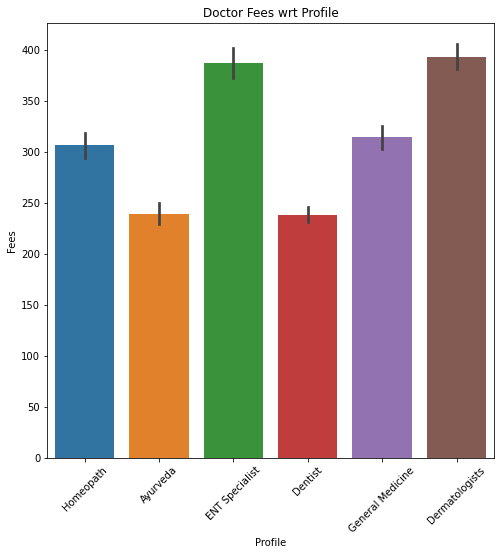

In [127]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df1)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

we can see the doctor fees according to the thier specialisation

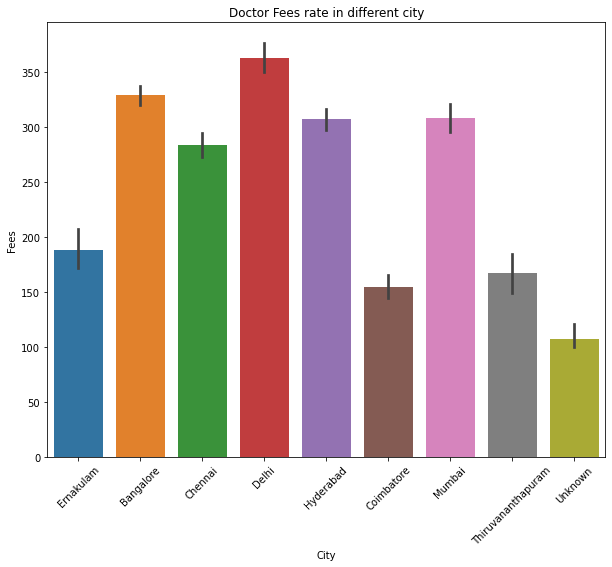

In [128]:
plt.figure(figsize=(10,8))
sns.barplot(x='City',y='Fees',data=df1)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()



since the cities of  Delhi, Banglore, Hyderabad, Mumbai and Chennai come under Tier 1 city,so the  fees in these  cities are very high as compared to Tier 2 and Tier 3 city.
Fees of the specialist like ENT  and Dermatologist is high than Homeopathy and General medicine.

In [129]:
df1 = pd.get_dummies(df1,columns=['City','Profile'], prefix=['city','Profile'])

In [130]:
df1.head()

,Experience,Rating,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0




Miscellaneous_Info is not clear as it consist the same information like doctor address .

In [131]:
df1.drop(['Miscellaneous_Info',],axis=1,inplace=True)

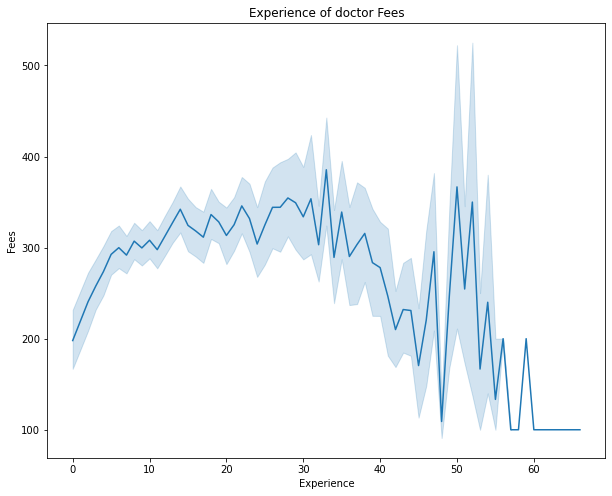

In [169]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df1)
ax.set_title("Experience of doctor Fees")
plt.show()

we can see the plot of the doctors expierence in accordance with the fees they get.

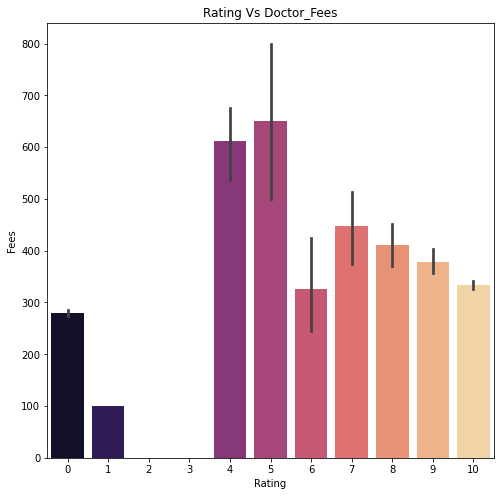

In [133]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=df1,palette='magma')
plt.title("Rating and Doctor_Fees")
plt.show()

we can see rating of the doctor according to the fees they are getting.we can see the fees of 350 has more number of ratings.

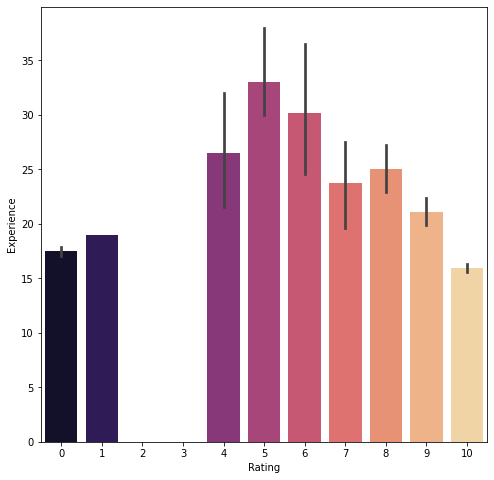

In [134]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=df1,palette='magma')
plt.show()

the rating column is grouped in the bins of 10,the ratings are also given in accordance with the number of years of expierence they have.

In [135]:
df1.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# TEST DATASET

In [136]:
df2=pd.read_csv("doctor_test.csv", error_bad_lines=False,delimiter='\t')
df2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


we are changing the expierence column from string as integer type and the place column is also extracted from string to integer.

In [137]:

df2['Experience'] = df2['Experience'].str.split()
df2['Experience'] = df2['Experience'].str[0].astype("int")


df2['Place'].fillna('Unknown,Unknown',inplace=True)
df2['locality'] = df2['Place'].str.split(",").str[0]
df2['city'] = df2['Place'].str.split(",").str[1]
#drop place column
df2.drop('Place',axis=1,inplace=True)

In [138]:
df2["Rating"].fillna("-99%",inplace=True)
df2["Rating"]=df2["Rating"].str[:-1].astype("int")

bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df2["Rating"]=pd.cut(df2["Rating"],bins=bins,labels=labels,include_lowest=True)

In [139]:

most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

In [140]:

for title in final_qual:
    df2[title] = 0

In [141]:
for x,y in zip(df2['Qualification'].values, np.array([i for i in range(len(df2))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df2[c][y] = 1

In [142]:

df2.drop('Qualification',axis=1,inplace=True)

In [144]:
#enoding the  city and profile
df2 = pd.get_dummies(df2, columns=['Profile'], prefix=['Profile'])

In [145]:
#drop Miscellaneous_Info 
df2.drop(['Miscellaneous_Info',], axis=1, inplace=True)

Feature Scalling
StandardScaler xbar = x - mean(x) / std(x)

In [146]:
x = df1.drop('Fees',axis=1)
y = df1['Fees']

# Standard Scaler

In [147]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

In [148]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model Building


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [150]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [151]:
lr_pred=lr.predict(x_test)

In [152]:
lr_pred

array([279.16265562, 328.91265562, 183.03765562, ..., 278.41265562,
       324.41265562, 262.41265562])

In [153]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

18

In [154]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, lr_pred)

137.4546783989264

In [155]:
print("RMSE VALUE = ",mean_squared_error(y_test, lr_pred,squared = False))

RMSE VALUE =  174.606273481138


In [156]:
import numpy as np
o = np.array(y_test)

In [157]:
print("original fees  is " ,o[0])
print("predicted average fees is " , lr_pred[0])

original fees  is  300
predicted average fees is  279.16265561916686


# Conclusion

# # original fees  is  300,predicted average fees is  279.16265561916686

Linear regression gives us best score.we can see other algorithms below:

In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#for RMSLE we will create  own scorer
from sklearn.metrics import make_scorer

In [159]:

def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make  own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)


In [160]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [161]:
#Training,Testing
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7759692513240842
SVR() 0.7942077126478044
DecisionTreeRegressor() 0.670077774121228
RandomForestRegressor() 0.764347676287566


# HyperParameter Tuning

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [163]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])

#gridsearch = GridSearchCV(svm_reg, param_grid=parameters, cv=5, scoring=scorer verbose=1, n_jobs=-1)
svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [164]:
svm_random.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [165]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.8056521524720275
best_params:
 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


In [166]:
# predict the test data from it and see the result
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.804639194678942


# Saving the model

In [167]:
import pickle

filename='doctorfile.pkl'
pickle.dump(lr,open(filename,'wb'))

#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([279.16265562, 328.91265562, 183.03765562, ..., 278.41265562,
       324.41265562, 262.41265562])